In [49]:
!pip install shap

!pip install lime

!pip install scikit-survival
!pip install pydantic pandas_profiling
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install scikit-survival
!pip install scikit-learn
!pip install --upgrade scikit-learn
!pip install xgboost
!pip install pickle

  Using cached joblib-1.1.1-py2.py3-none-any.whl.metadata (5.2 kB)
Using cached joblib-1.1.1-py2.py3-none-any.whl (309 kB)
  Attempting uninstall: joblib
    Found existing installation: joblib 1.4.2
    Uninstalling joblib-1.4.2:
      Successfully uninstalled joblib-1.4.2


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
scikit-learn 1.5.1 requires joblib>=1.2.0, but you have joblib 1.1.1 which is incompatible.


  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
Using cached joblib-1.4.2-py3-none-any.whl (301 kB)
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.1
    Uninstalling joblib-1.1.1:
      Successfully uninstalled joblib-1.1.1


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-profiling 3.2.0 requires joblib~=1.1.0, but you have joblib 1.4.2 which is incompatible.


ERROR: Could not find a version that satisfies the requirement pickle (from versions: none)
ERROR: No matching distribution found for pickle


In [50]:
import shap
shap.initjs()

import pickle
import pandas as pd
import lime
import lime.lime_tabular
import sklearn
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
#from sklearn.metrics import plot_confusion_matrix
import numpy as np

In [51]:
### XAI LOGISTIC REGRESSION

In [52]:
# SHAP

In [53]:
#Load
X = pd.read_pickle('X.pkl')

with open('C:\\Users\\T00758722\\Downloads\\X_train', 'rb') as array_file:
    X_train = pickle.load(array_file)
    
with open('C:\\Users\\T00758722\\Downloads\\X_test', 'rb') as array_file:
    X_test = pickle.load(array_file)

    
with open('best_model.pkl', 'rb') as model_file:
    best_model = pickle.load(model_file)

with open('best_selected_features.pkl', 'rb') as list_file:
    best_selected_features = pickle.load(list_file)

C:\Users\T00758722\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LogisticRegression from version 1.4.2 when using version 1.5.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [54]:
#  Create new training and test sets with the best selected features
X_train_best = pd.DataFrame(X_train, columns=X.columns)[best_selected_features]
X_test_best = pd.DataFrame(X_test, columns=X.columns)[best_selected_features]


In [55]:
explainer = shap.Explainer(best_model, X_train_best)

In [56]:
shap_values = explainer(X_test_best)
#shap_values_selected = shap_values[:, X_test_best.columns.isin(significant_features), :]

In [57]:
print(type(X_test))
X_train_array = X_train_best.values

<class 'numpy.ndarray'>


In [58]:
print(type(shap_values[:, :, 0]))
print(type(X_train_best))
print(type(best_model.classes_))


<class 'shap._explanation.Explanation'>
<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>


In [59]:
print(shap_values.shape)

(116, 62, 3)


In [60]:
shap_values

.values =
array([[[ 0.29218813, -0.7196146 ,  0.42742647],
        [ 0.5592371 , -0.29668699, -0.26255012],
        [ 0.55229726, -0.27821001, -0.27408725],
        ...,
        [ 0.0571756 , -0.12238581,  0.06521021],
        [ 0.07141008, -0.11038366,  0.03897359],
        [ 0.22041932,  0.03472405, -0.25514337]],

       [[-0.49955259,  1.2303215 , -0.7307689 ],
        [-0.25804763,  0.13689967,  0.12114796],
        [-0.26556341,  0.13377289,  0.13179052],
        ...,
        [-0.07810776,  0.16719163, -0.08908386],
        [-0.14297283,  0.22100333, -0.0780305 ],
        [-0.1507463 , -0.02374802,  0.17449432]],

       [[ 0.35660217, -0.87825652,  0.52165435],
        [ 0.56724704, -0.30093643, -0.26631062],
        [ 0.54209079, -0.27306868, -0.26902211],
        ...,
        [ 0.05780935, -0.12374237,  0.06593302],
        [ 0.07376724, -0.1140273 ,  0.04026006],
        [ 0.22720572,  0.03579315, -0.26299887]],

       ...,

       [[ 0.09224752, -0.22719151,  0.13494399],
 

In [61]:
best_model.classes_

array([0, 1, 2])

In [62]:
len(best_selected_features)

62

In [63]:
class_names = ['astrocytoma', 'glioblastoma', 'oligodendroglioma']

In [64]:
# #Gaficar todas las graficas de las clases en un mismo codigo

# #De barras
# # Itera sobre cada clase (asumiendo que la última dimensión son las clases)
# for class_index in range(shap_values.shape[2]):
#     # Obtén los valores SHAP para la clase actual
#     shap_values_class = shap_values[:, :, class_index]
    
#     # Grafica el summary plot para la clase actual
#     shap.summary_plot(shap_values_class, X_test_best.values, plot_type="bar", class_names= best_model.classes_, feature_names = best_selected_features)
#     plt.title(f'Summary Plot - Clase {best_model.classes_[class_index]}')
#     plt.show()
    
    
    
# #dE la otra
# # Itera sobre cada clase (asumiendo que la última dimensión son las clases)
# for class_index in range(shap_values.shape[2]):
#     # Obtén los valores SHAP para la clase actual
#     shap_values_class = shap_values[:, :, class_index]
    
#     # Grafica el summary plot para la clase actual
#     plt.figure(figsize=(10, 6))  # Ajusta el tamaño de la figura según sea necesario
#     shap.summary_plot(shap_values_class, feature_names=best_selected_features, class_names=best_model.classes_)
#     plt.title(f'Summary Plot - Clase {best_model.classes_[class_index]}')
#     plt.show()

In [65]:
X_train_best = X_train_best[best_selected_features].values
X_test_best = X_test_best[best_selected_features].values

In [66]:
# # Transponer shap_values para que la dimensión de clase esté en la última posición
# shap_values_transposed = np.transpose(shap_values, (1, 0, 2))  # ahora tiene dimensiones (62, 116, 3)
# shap_values_transposed

In [67]:
### astrocytoma: 0

In [68]:
# shap.summary_plot(shap_values[:, :, 0], plot_type="bar", class_names= best_model.classes_, feature_names = best_selected_features)

In [69]:
# shap.summary_plot(shap_values[:, :, 0], feature_names=best_selected_features, class_names=best_model.classes_)

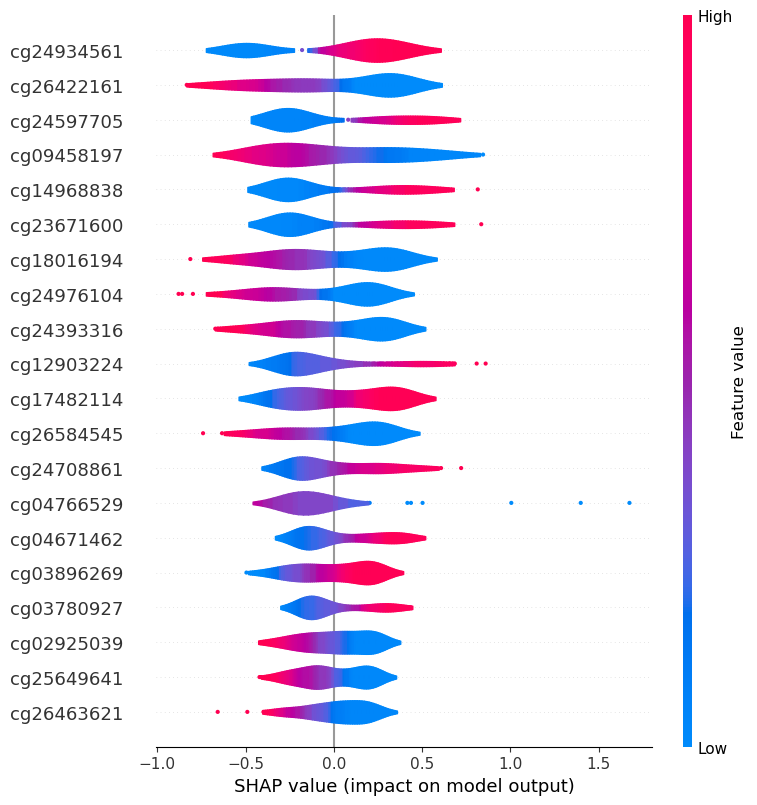

In [70]:
shap.plots.violin(shap_values[:, :, 0], feature_names=best_selected_features)

In [71]:
# shap.plots.heatmap(shap_values[:, :, 0])

In [72]:
# #SHAP scatter plots
# shap.plots.scatter(shap_values[:, :, 0])

In [73]:
# waterfall plot:  local analysis plot of a single instance prediction.

# On the left are the features value and on the arrows the feature contribution to the prediction.
#Each row shows how the positive (red) or negative (blue) contribution of each feature moves the value from the expected model output over the background dataset to the model output for this prediction

In [74]:
# row = 8
# shap.waterfall_plot(shap.Explanation(values=shap_values[:, :, 0][row], 
#                                               base_values=explainer.expected_value[0], data=X_test_best.iloc[row],  
#                                          feature_names=best_selected_features))

In [75]:
# row = 7
# shap.waterfall_plot(shap.Explanation(values=shap_values[:, :, 0][row], 
#                                               base_values=explainer.expected_value[0], data=X_test_best.iloc[row],  
#                                          feature_names=best_selected_features))

In [76]:
### glioblastoma: 1

In [77]:
# shap.summary_plot(shap_values[:, :, 1], plot_type="bar", class_names= best_model.classes_, feature_names = best_selected_features)

In [78]:
# shap.summary_plot(shap_values[:, :, 1], feature_names=best_selected_features, class_names=best_model.classes_)

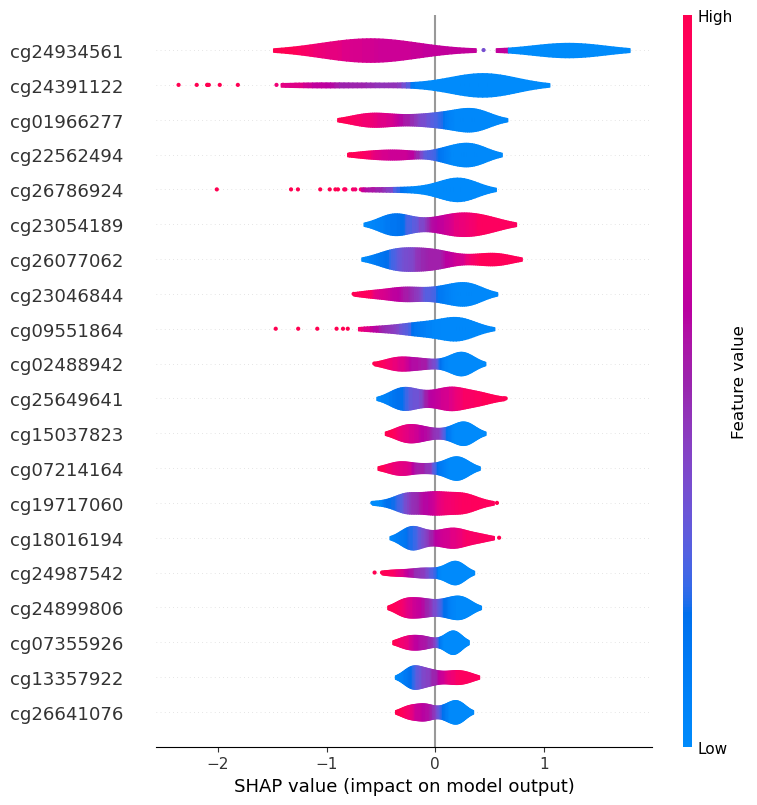

In [79]:
shap.plots.violin(shap_values[:, :, 1], feature_names=best_selected_features)

In [80]:
### oligodendroglioma: 2

In [81]:
# shap.summary_plot(shap_values[:, :, 2], plot_type="bar", class_names= best_model.classes_, feature_names = best_selected_features)

In [82]:
# shap.summary_plot(shap_values[:, :, 2], feature_names=best_selected_features, class_names=best_model.classes_)

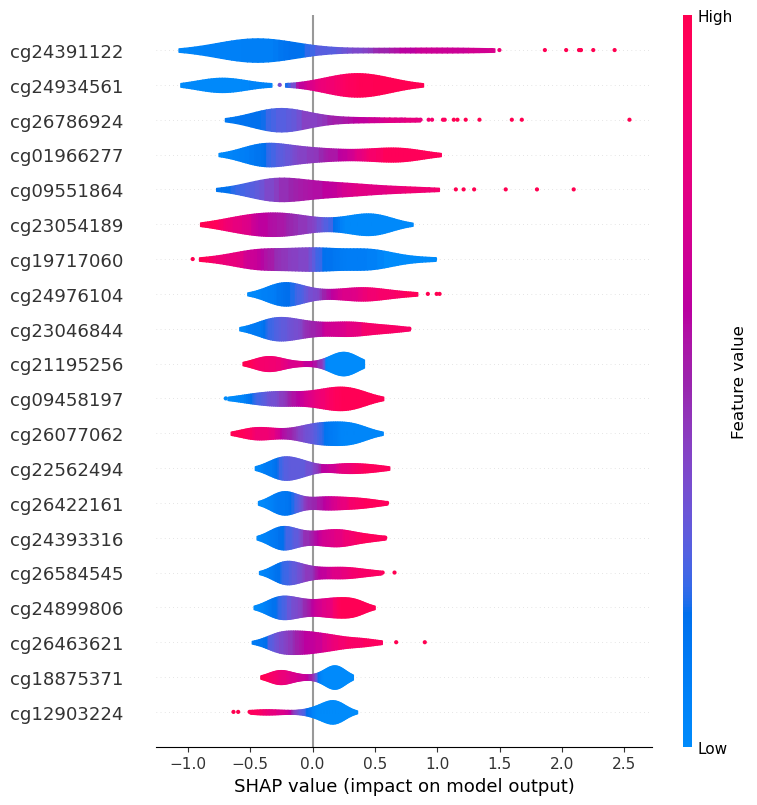

In [88]:
shap.plots.violin(shap_values[:, :, 2], feature_names=best_selected_features)

In [84]:
#FEATURES

In [92]:
shap_values_class3 = shap_values[:, :, 2]
# Crear un DataFrame de pandas con los datos y nombres de características
df_shap = pd.DataFrame(data=shap_values_class3, columns=best_selected_features)

# Guardar los datos a un archivo CSV
df_shap.to_csv('shap_values_500.csv', index=False) 

ValueError: DataFrame constructor not properly called!

In [ ]:
# feature_names_subset = best_selected_features[:500]
# shap_values_subset = shap_values[:500, :, 2]
# for i, feature_name in enumerate(feature_names_subset):
#     shap_value = shap_values_subset[i]
#     print(f"Nombre: {feature_name}")

In [ ]:
# #25
# feature_names=best_selected_features
# first_25_feature_names = feature_names[:25]


# df_feature_names = pd.DataFrame(first_25_feature_names, columns=['Feature Names'])


# excel_file = 'feature_25.xlsx'
# df_feature_names.to_excel(excel_file, index=False)
# print(f"DataFrame guardado en '{excel_file}'.")

In [30]:
# LIME

In [70]:
X_train_best = pd.DataFrame(X_train, columns=X.columns)[best_selected_features]
X_test_best = pd.DataFrame(X_test, columns=X.columns)[best_selected_features]


In [71]:
from lime.lime_tabular import LimeTabularExplainer
class_names = best_model.classes_

# Get the feature names
feature_names = list(X_train_best.columns)

# Fit the Explainer on the training data set using the LimeTabularExplainer
explainerLIME_LG = LimeTabularExplainer(X_train_best.values, feature_names =     
                                 feature_names,
                                 class_names = class_names, 
                                 mode = 'classification')

In [72]:
# Explain the instance
instance_to_explain_LG = X_train_best.iloc[0]  # Replace with the instance you want to explain
explanationLIME_LG = explainerLIME_LG.explain_instance(instance_to_explain_LG,
                                         best_model.predict_proba,
                                         num_features=len(feature_names))

C:\Users\T00758722\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [73]:
explanationLIME_LG.show_in_notebook()

In [ ]:
# instance_to_explain = X_train_best.iloc[0]  # Replace with the instance you want to explain

# # Explain the instance
# explanation = explainer.explain_instance(instance_to_explain, 
#                                          best_model.predict_proba, 
#                                          num_features=len(feature_names))

# # Visualize the explanation
# explanation.show_in_notebook()  # This will display the explanation in a Jupyter notebook

In [ ]:
# fig = plt.figure(figsize=(25,20))
# _ = plot_tree(dt_clf,
#                	feature_names = feature_names,
#                	class_names = class_names,
#                	filled=True)

In [ ]:
### XAI RANDOM FOREST

In [32]:
# Load 
X2 = pd.read_pickle('X2.pkl')

# with open('X_train2.pkl', 'rb') as array_file:
#     X_train2 = pickle.load(array_file)
    
with open('C:\\Users\\T00758722\\Downloads\\X_train2', 'rb') as array_file:
    X_train2 = pickle.load(array_file)
    
with open('C:\\Users\\T00758722\\Downloads\\X_test2', 'rb') as array_file:
    X_test2 = pickle.load(array_file)

with open('important_features2.pkl', 'rb') as list_file:
    important_features2= pickle.load(list_file)
    
with open('modelRF.pkl', 'rb') as model_file:
    modelRF = pickle.load(model_file)
    
with open('C:\\Users\\T00758722\\Downloads\\y_train2', 'rb') as array_file:
    y_train2 = pickle.load(array_file)

In [33]:
X_train2= pd.DataFrame(X_train2, columns=X2.columns)
X_test2= pd.DataFrame(X_test2, columns=X2.columns)

In [34]:
explainer2 = shap.TreeExplainer(modelRF)
shap_values2 = explainer2(X_test2)

In [35]:
len(important_features2)

403959

In [36]:
### astrocytoma: 0

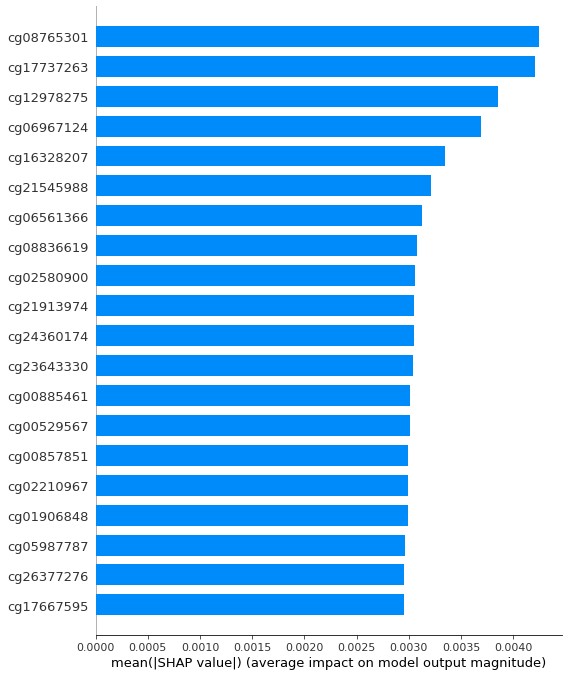

In [37]:
# shap.summary_plot(shap_values2[:, :, 0], feature_names=important_features2.index.tolist(), class_names=modelRF.classes_, plot_type="bar")

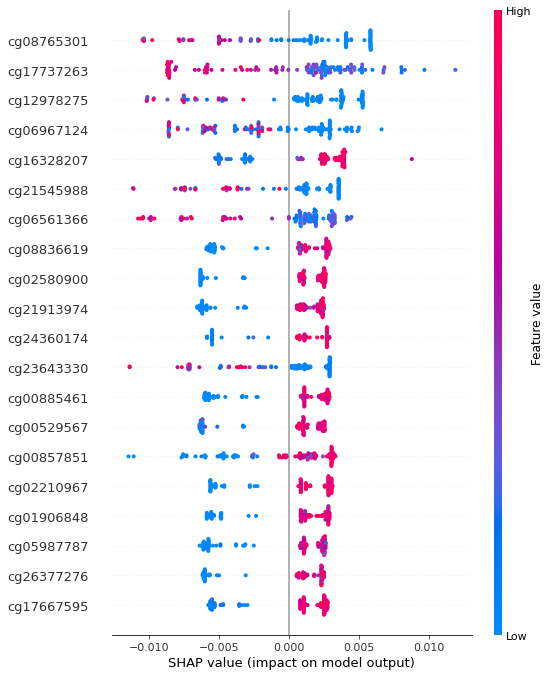

In [38]:
# # shap.summary_plot(shap_values2, X_test2)

# shap.summary_plot(shap_values2[:, :, 0], feature_names=important_features2.index.tolist(), class_names=modelRF.classes_)

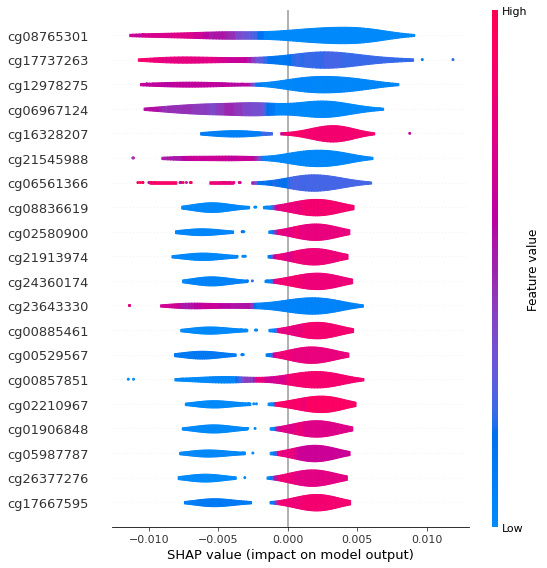

In [66]:
shap.plots.violin(shap_values2[:, :, 0], feature_names=important_features2.index.tolist())

In [39]:
### glioblastoma: 1

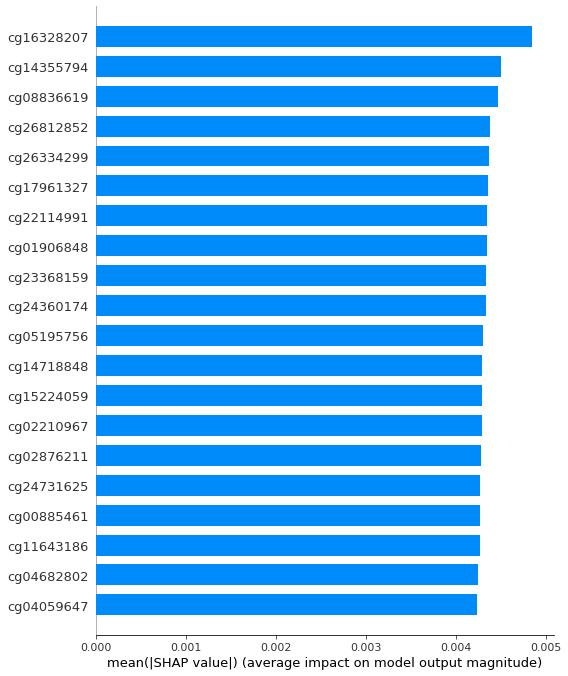

In [40]:
# shap.summary_plot(shap_values2[:, :, 1], feature_names=important_features2.index.tolist(), class_names=modelRF.classes_, plot_type="bar")

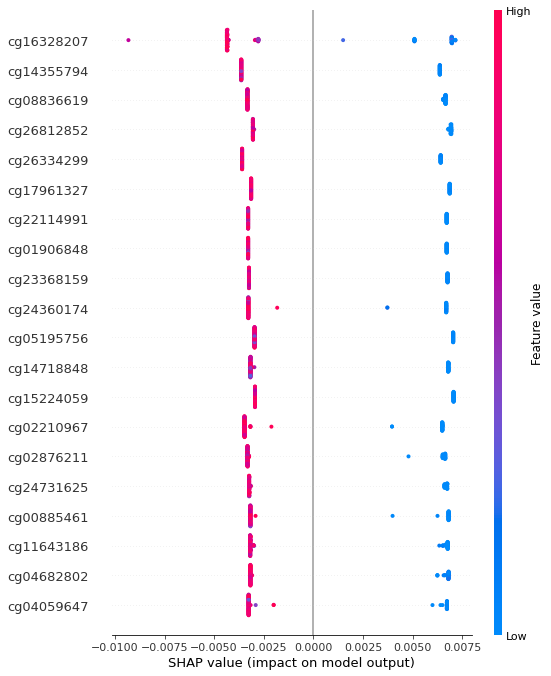

In [41]:
# shap.summary_plot(shap_values2[:, :, 1], feature_names=important_features2.index.tolist(), class_names=modelRF.classes_)

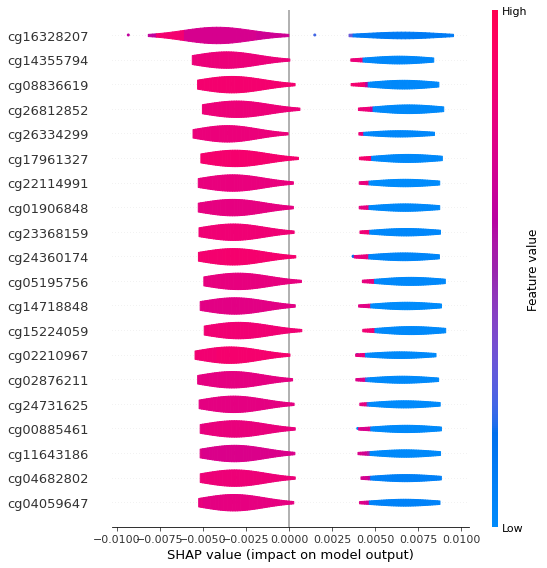

In [67]:
shap.plots.violin(shap_values2[:, :, 1], feature_names=important_features2.index.tolist())

In [42]:
### oligodendroglioma: 2

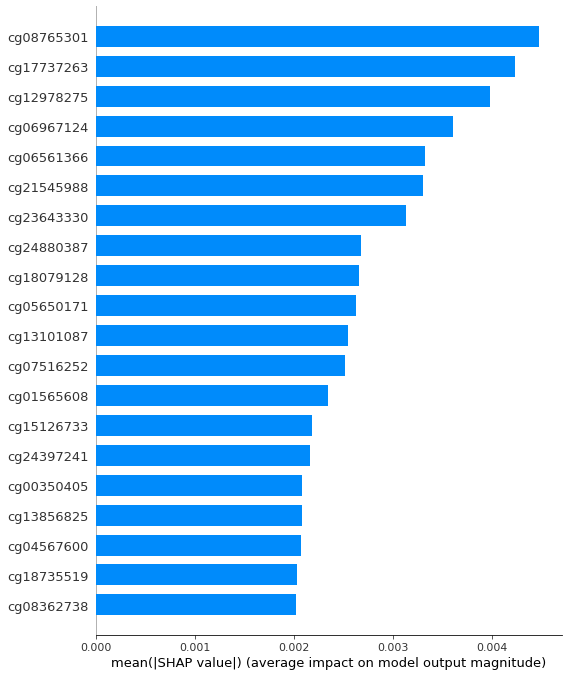

In [43]:
# shap.summary_plot(shap_values2[:, :, 2], feature_names=important_features2.index.tolist(), class_names=modelRF.classes_, plot_type="bar")

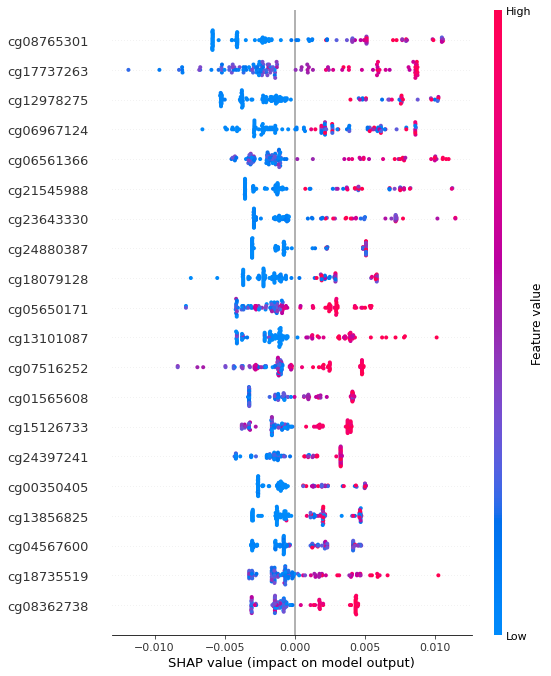

In [44]:
# shap.summary_plot(shap_values2[:, :, 2], feature_names=important_features2.index.tolist(), class_names=modelRF.classes_)

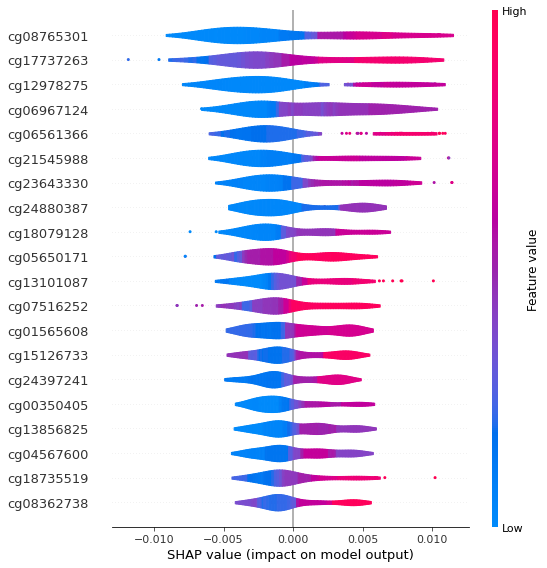

In [68]:
shap.plots.violin(shap_values2[:, :, 2], feature_names=important_features2.index.tolist())

In [ ]:
# # Create the force plot
# shap.plots.force(explainer2.expected_value[0], shap_values2[..., 0], matplotlib=True)

# # Display the plot
# plt.show()

# shap.plots.force(explainer2.expected_value, shap_values2[0], matplotlib=True)
# plt.show()

In [ ]:
# # Single feature
# feature_index = 10
# shap.dependence_plot(feature_index, shap_values2, X_train2, feature_names=important_features2.index.tolist())

In [ ]:
# LIME

In [79]:
# # LIME explanation
# explainer = lime.lime_tabular.LimeTabularExplainer(X_train2, mode='classification', training_labels=y_train2,
#                                                    feature_names=important_features2.index.tolist(), random_state=42)

# # Choose an instance for which you want to explain the prediction (e.g., the first instance in X_test2)
# instance = X_test2[0]

# # Generate explanation
# exp = explainer.explain_instance(instance, modelRF.predict_proba, num_features=10)

# # Print explanation for the predicted class
# print('LIME Explanation for the instance:')
# # exp.show_in_notebook(show_table=True, show_all=False)  # You can adjust parameters as needed

In [ ]:
# from lime.lime_tabular import LimeTabularExplainer
# class_names2 = modelRF.classes_
# feature_names2 = list(X_train2.columns)

In [ ]:
# # Fit the Explainer on the training data set using the LimeTabularExplainer
# explainerLIME_RF = LimeTabularExplainer(X_train2.values, feature_names =     
#                                  feature_names2,
#                                  class_names = class_names2, 
#                                  mode = 'classification')

In [ ]:
# # Fit the LimeTabularExplainer
# explainerLIME_RF = LimeTabularExplainer(X_train2.values,
#                                  feature_names=list(X_train2.columns),
#                                  class_names=modelRF.classes_,
#                                  mode='classification')

In [ ]:
# explainerLIME_RF

In [ ]:
# # Explain the instance
# instance_to_explain = X_train2.iloc[0]  # Replace with the instance you want to explain
# explanationLIME_RF = explainerLIME_RF.explain_instance(instance_to_explain,
#                                          modelRF.predict_proba,
#                                          num_features=len(feature_names2))

In [ ]:
# instance_to_explain

In [ ]:
# explanationLIME_RF.show_in_notebook(text=False)

In [ ]:
# Visualize the explanation 

# # Example: Plot the feature importances
# feature_importances = explanation.as_list()

# # Extract feature names and importances
# features = [x[0] for x in feature_importances]
# importances = [x[1] for x in feature_importances]

# # Plotting feature importances
# plt.figure(figsize=(10, 6))
# plt.barh(features, importances, color='skyblue')

# plt.show()

#explainerLIME_RF .show_in_notebook()
# fig = explanationLIME_RF.as_pyplot_figure()
# plt.title('LIME Explanation')
# plt.show()